# Analysis of FIFA2020 Players

## Content

    
* [Introduction](#Introduction)
    * [Variable Description](#Variable_Description)
* [Research questions](#Objectives)
* [1. Data Preparation](#Data_Preparation)
    * [Checking for missing values](#Checking_for_missing_values)
    * [Changing Position to Position Groups](#Changing_Position_to_Position_Groups)
* [2. Data Analysis](#Data_Analysis)
    * [2.1 Analysis countries by players parametrs](#Analysis_countries)
    * [2.2 Right-handed vs left-handed](#Right-handed)
    * [2.3 Analysis player rating-to-age ratio and rating-to-position, reputation-to-age](#Analysis_player)
* [3. Conclusion](#Conclusion)

<div style="background: #0f214f;">
    <img src="https://piunikaweb.com/wp-content/uploads/2020/03/image_1585670159337.jpg" width="82%">
</div>

<a id="Introduction"></a>
# Introduction
FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. Each player in FIFA has an overall rating as well as six scores for the key stats; Pace, Shooting, Passing, Dribbling, Defending, and Physical. These stats are combined with a player's international recognition to calculate the player's overall rating.

<div style="background: #0f214f;">
    <img src="https://www.footboom.net/img/upload/2/59edc-FIFA-18.jpeg" width="70%">
</div>

<a id="Variable_Description"></a>
## Variable Description
1. full_name - name and surname of the player
2. age - age of the player
3. country - country of the player
4. club - his football club where he plays
5. rating - player rating(0-99) in the game
6. value - player value in euro
7. wage - player salary in euro
8. foot - leading leg
9. reputation - player's recognition internationally, player popularity, on a 5 point scale.
10. position - player's best position in the club
11. league - set of commands.

* int64(5): age, overall, value, wage, reputation
* object(6): full_name, country, club, foot, position, league

<a id="Research questions"></a>
# Research questions
1. <a style="text-decoration: none; color: black;" href="#Analysis_countries">Analysis leagues by players parametrs</a>
2. <a style="text-decoration: none; color: black;" href="#Analysis_leagues">Right-handed vs left-handed</a>
3. <a style="text-decoration: none; color: black;" href="#Analysis_player">Analysis players ratings-to-age ratio and ratings-to-position, reputation-to-age</a>

### Libraries

In [1]:
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<a id="Data_Preparation"></a>
#  1. Data Preparation

Data was taken from [`sofifa.com`](https://sofifa.com/).

#### Reading from the CSV file

In [2]:
fifa20_df = pd.read_csv('players.csv')

In [3]:
fifa20_df.head()

,full_name,age,country,rating,club,foot,position,value,wage,reputation
0,L. Messi,33,Argentina,93,FC Barcelona,Left,RW,103500000,560000,5
1,Cristiano Ronaldo,35,Portugal,92,Juventus,Right,ST,63000000,220000,5
2,J. Oblak,27,Slovenia,91,Atlético Madrid,Right,GK,120000000,125000,3
3,K. De Bruyne,29,Belgium,91,Manchester City,Right,CAM,129000000,370000,4
4,Neymar Jr,28,Brazil,91,Paris Saint-Germain,Right,LW,132000000,270000,5


<a id="Checking_for_missing_values"></a>
## Checking for missing values

In [4]:
fifa20_df.shape

(18840, 10)

The dataset has 18840 players with 10 columns of data.

In [5]:
fifa20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18840 entries, 0 to 18839
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_name   18840 non-null  object
 1   age         18840 non-null  int64 
 2   country     18840 non-null  object
 3   rating      18840 non-null  int64 
 4   club        18591 non-null  object
 5   foot        18840 non-null  object
 6   position    18840 non-null  object
 7   value       18840 non-null  int64 
 8   wage        18840 non-null  int64 
 9   reputation  18840 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.4+ MB


In [6]:
fifa20_df.isnull().sum()

full_name       0
age             0
country         0
rating          0
club          249
foot            0
position        0
value           0
wage            0
reputation      0
dtype: int64

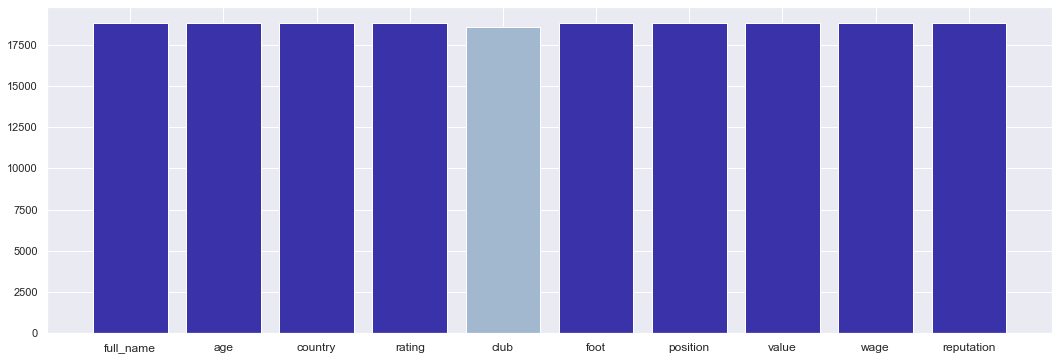

In [7]:
df_nulls = abs(fifa20_df.isnull().sum()-len(fifa20_df.index))

df_lessthan = [i if i != len(fifa20_df.index) else 0 for i in df_nulls]

fig = plt.subplots(figsize=(18,6))
plt.bar(df_nulls.index, df_nulls.values, color='#3a32a8')
plt.bar(df_nulls.index, df_lessthan, color='#a1b8cf')
plt.xticks(rotation = 0, fontsize = 12)
plt.show()

In this table, the columns with missing values are highlighted in gray. Looking at the table and previous informations, we can see that only the `club` column has 249 missing values. And as we can see here the missing values does not play an important role in our dataset, so here I can drop rows with missing values.

In [8]:
fifa20_df = fifa20_df.dropna()
#After deleting rows with missing values, we adjust the indexes.
fifa20_df.reset_index(drop=True, inplace=True)
fifa20_df.tail()

,full_name,age,country,rating,club,foot,position,value,wage,reputation
18586,H. Delgado,18,Ecuador,48,Independiente del Valle,Right,CB,120000,500,1
18587,L. Walker,30,England,48,Milton Keynes Dons,Right,GK,30000,1000,1
18588,J. Browne,19,Republic of Ireland,48,Finn Harps,Right,ST,100000,500,1
18589,M. Ćoćić,17,Serbia,48,TSV 1860 München,Left,LM,120000,500,1
18590,Tan Chun Lok,24,Hong Kong,48,Guangzhou R&F FC,Right,RM,70000,2000,1


<a id="Changing_Position_to_Position_Groups"></a>
## Changing Position to Position Groups.

In [9]:
position_groups = fifa20_df.groupby(['position']).sum()
len(position_groups)

15

As we can see here 15 type of positions. In order not to complicate our analysis, we will create 4 main groups of positions: forwards, мidfields, defenders, goalkeeper. 

In [10]:
position_groups

,age,rating,value,wage,reputation
position,,,,,
CAM,52515,147451,8418624997,21331000,2480
CB,92175,236559,8660439997,30737200,3915
CDM,36728,94454,4289269999,13698600,1555
CF,2328,5570,554784999,1954150,110
CM,26128,68549,4509029995,14065150,1177
GK,53273,131230,4332653997,13421750,2196
LB,26731,69141,2771869995,9301150,1103
LM,21571,57379,2668614997,7881600,924
LW,4852,12528,987594998,2878150,223


As shown in the picture below. Forwards - red, мidfielders - yellow, defenders - blue, goalkeeper - grey.

Positions from the table will be distributed as follows: <br>
<span style="color:#fc0000">Forward</span> <= ( CF, RW, LW, ST )<br>
<span style="color:#e7e753">Midfielder</span> <= ( CAM, CDM, CM, LM, RM )<br>
<span style="color:#1e08fe">Defender</span> <= ( CB, LB, RB, LWB, RWB )<br>
<span style="color:#808080">Goalkeeper</span> <= ( GK )

<img src="https://sun9-7.userapi.com/hfcdaZx7LmnUrYwDaLZMyTv8j73InTjhDDHKYg/o-3U9IhTrPs.jpg" width="30%">

In [11]:
fifa20_df['position'].replace({'CF': 'Forward', 'CF': 'Forward', 'RW': 'Forward', 'LW': 'Forward', 'ST': 'Forward'}, inplace=True)
fifa20_df['position'].replace({'CAM': 'Midfielder','CM': 'Midfielder', 'CDM': 'Midfielder', 'RM': 'Midfielder', 'LM': 'Midfielder'}, inplace=True)
fifa20_df['position'].replace({'LWB': 'Defender', 'LB': 'Defender', 'CB': 'Defender', 'RB': 'Defender', 'RWB': 'Defender'}, inplace=True)
fifa20_df['position'].replace({'GK': 'Goalkeeper'}, inplace=True)

In [12]:
position_groups = fifa20_df.groupby(['position']).count()
position_groups

,full_name,age,country,rating,club,foot,value,wage,reputation
position,,,,,,,,,
Defender,6231,6231,6231,6231,6231,6231,6231,6231,6231
Forward,3201,3201,3201,3201,3201,3201,3201,3201,3201
Goalkeeper,2033,2033,2033,2033,2033,2033,2033,2033,2033
Midfielder,7126,7126,7126,7126,7126,7126,7126,7126,7126


In [13]:
position_groups = fifa20_df.groupby(['position']).sum()
position_groups

,age,rating,value,wage,reputation
position,,,,,
Defender,158410,410762,15728259986,54088200,6688
Forward,81225,210464,10250659990,34459100,3595
Goalkeeper,53273,131230,4332653997,13421750,2196
Midfielder,174424,469264,23644304984,68387550,7793


<a id="Data_Analysis"></a>
#  2. Data Analysis

3.1 [Analysis countries by players parametrs](#Analysis_countries)<br>
3.2 [Right-handed vs left-handed](#Right-handed)<br>
3.3 [Analysis player rating-to-age ratio and rating-to-position, reputation-to-age](#Analysis_player)<br>

<a id="Analysis_countries"></a>
## 3.1 Analysis countries by players parametrs

In this part, we will analyze countries by parameters such as age wage and freequency of players by country. Does the number of players depend on age or salary?

In [14]:
#creating a new country_groups where we will store the average amount of data
country_groups = fifa20_df.groupby(['country'], as_index=False).mean()
country_groups.head(1)

,country,age,rating,value,wage,reputation
0,Afghanistan,25.0,66.0,1150000.0,1500.0,1.0


In [15]:
#Total number for each group
count_numOfP = fifa20_df.groupby(['country'], as_index=False).count()
count_numOfP = count_numOfP.values.tolist()

In [16]:
#adding a new column where we will store the quantity
country_groups['quantity'] = country_groups['country']
#replace with the quantity.
for j in count_numOfP:
    country_groups['quantity'].replace({j[0]: j[1]}, inplace=True)
country_groups.head(1)

,country,age,rating,value,wage,reputation,quantity
0,Afghanistan,25.0,66.0,1150000.0,1500.0,1.0,2


In [17]:
count_numOfP = fifa20_df.groupby(['country'], as_index=False).count()
count_numOfP = count_numOfP.values.tolist()

In [18]:
country_groups.head(5)

,country,age,rating,value,wage,reputation,quantity
0,Afghanistan,25.000000,66.000000,1.150000e+06,1500.000000,1.000000,2
1,Albania,24.791667,64.708333,2.268125e+06,7095.833333,1.041667,48
2,Algeria,26.981132,70.679245,5.660377e+06,21943.396226,1.264151,53
3,Andorra,30.000000,64.000000,4.750000e+05,1000.000000,1.000000,1
4,Angola,24.695652,67.652174,2.815435e+06,8413.043478,1.086957,23


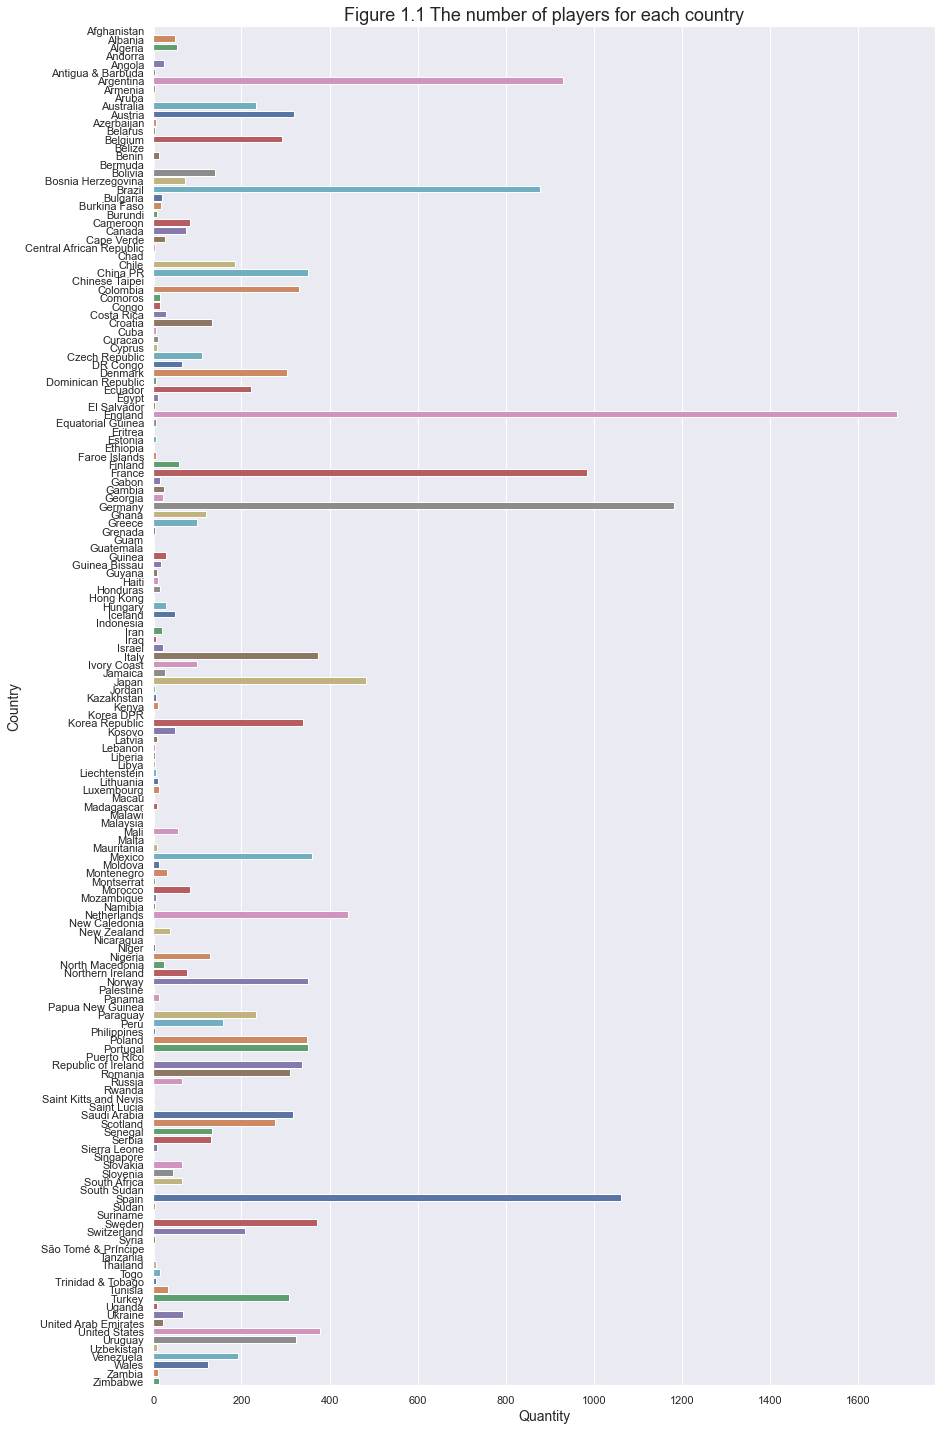

In [19]:
plt.figure(figsize = (14,25))

ax = sns.barplot(x='quantity', 
                y='country', 
                data=country_groups, 
                palette='deep')
ax.set_title("Figure 1.1 The number of players for each country", size = 18)
ax.set_ylabel('Country', size = 14)
ax.set_xlabel('Quantity', size = 14) 
ax.xaxis.grid(True)

This chart shows that England are ahead in terms of the number of players. Since the League that is located in England, The English Premier League, is the most popular.

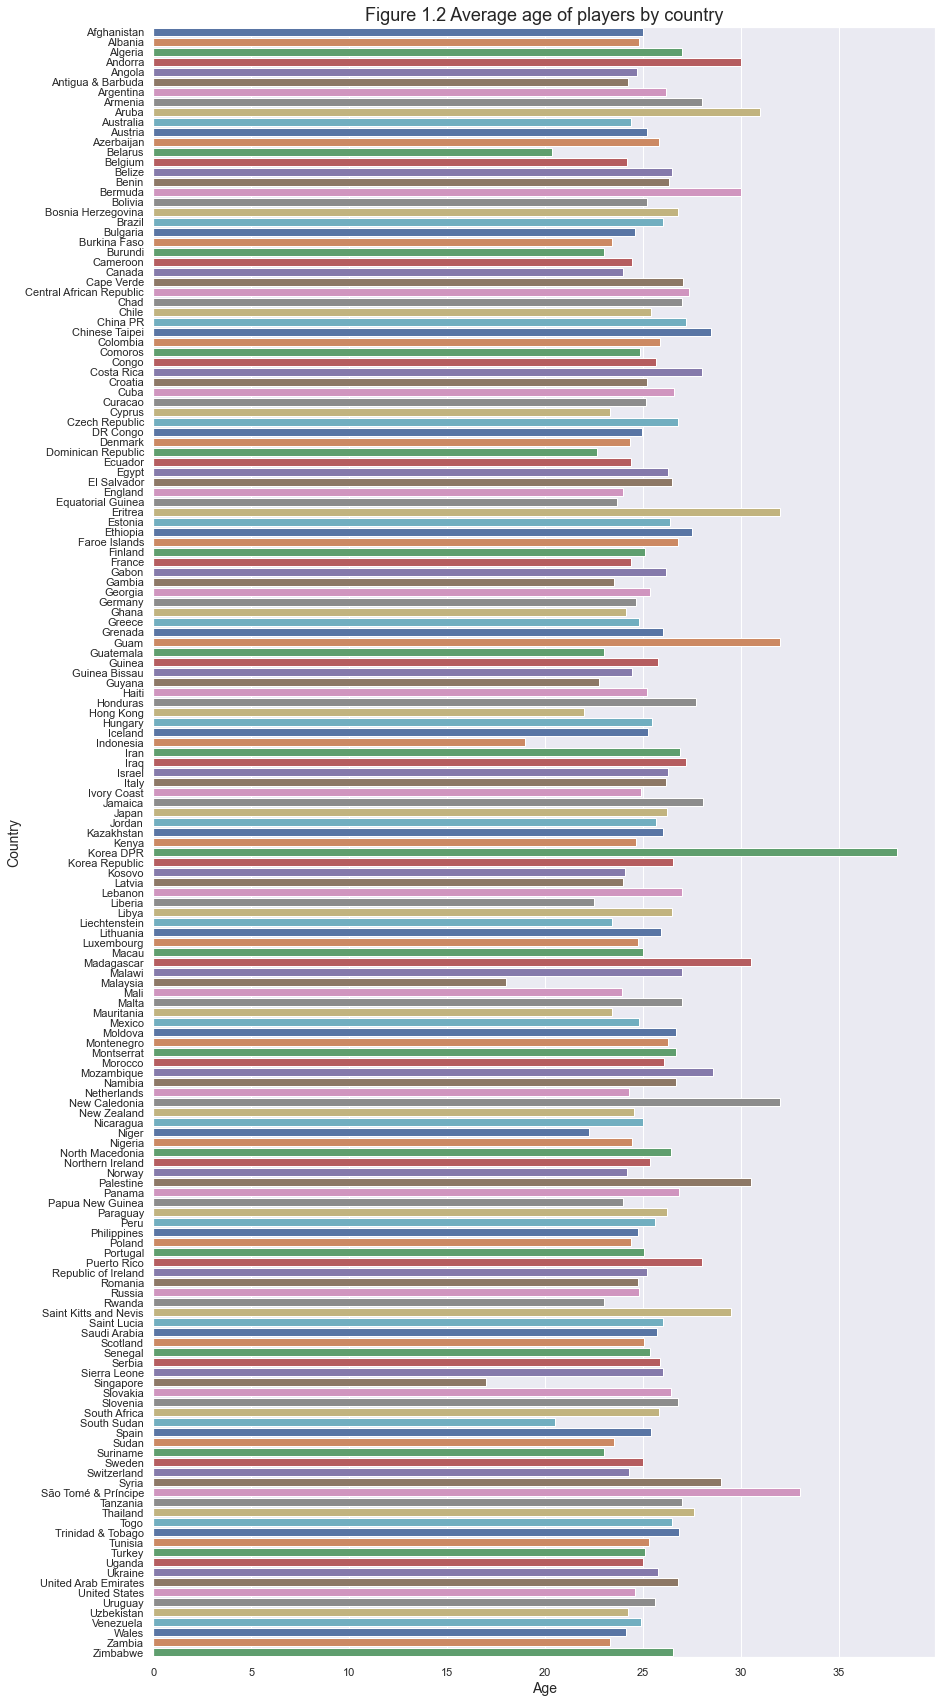

In [20]:
plt.figure(figsize = (14,30))

ax = sns.barplot(x='age', 
                y='country', 
                data=country_groups, 
                palette='deep')
ax.set_title("Figure 1.2 Average age of players by country", size = 18)
ax.set_ylabel('Country', size = 14)
ax.set_xlabel('Age', size = 14)
ax.xaxis.grid(True)

Here you can find out that the approximate age for many countries is 25 years. The youngest country by age is Malaysia. The oldest is Korea DPR 37 years old. It depends on the number of players from each country for example from Malaysia only one player who is 18 years old is playing.

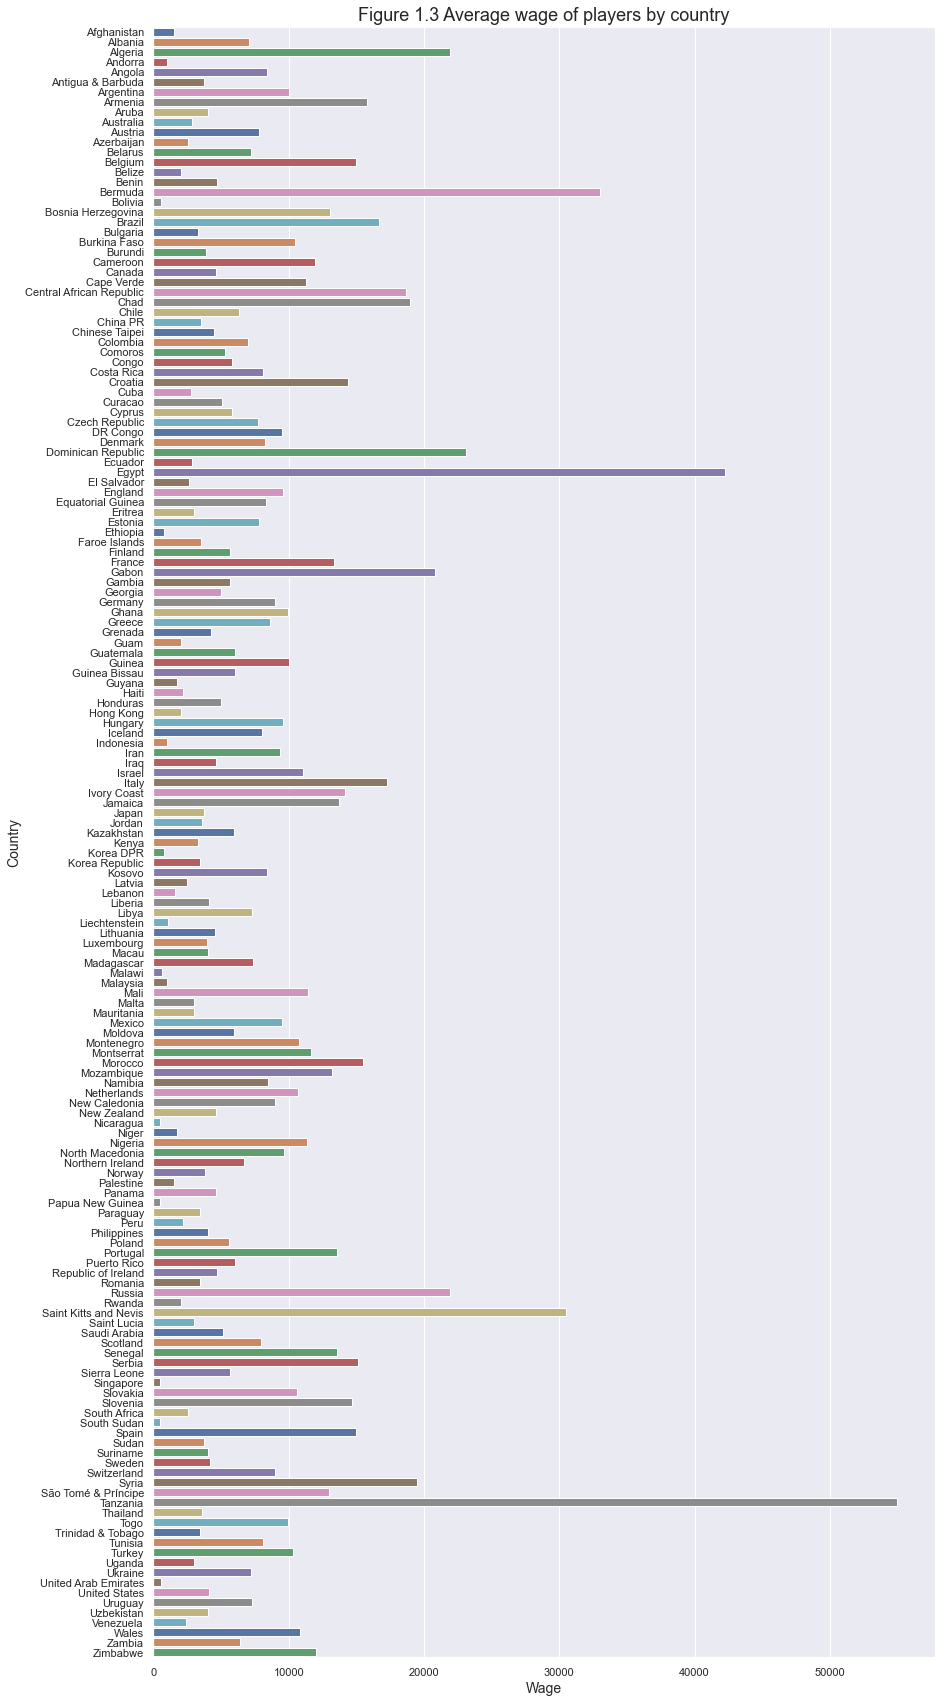

In [21]:
plt.figure(figsize = (14,30))

ax = sns.barplot(x='wage', 
                y='country', 
                data=country_groups, 
                palette='deep')
ax.set_title('Figure 1.3 Average wage of players by country', size = 18)
ax.set_ylabel('Country', size = 14)
ax.set_xlabel('Wage', size = 14)
ax.xaxis.grid(True)

On this map, you can find out that the highest-paid country by salary for each player is Tanzania. This again depends on the number of players from each country. Since there is only one player from Tanzania and the salary is 55 thousand, the average salary is high.

### Conclusion 'Analysis countries by players parametrs'
For this part we can say that England is the leading country in terms of quantity and the ratio of quantity and salary, since the salary is 9,540€, which is not a bad. And the average age is ~ 24 years. 

<a id="Right-handed"></a>
## 3.2 Right-handed vs left-handed

In this part, we will find out which players(left-handed or right-handed) are successful and by what parameters?

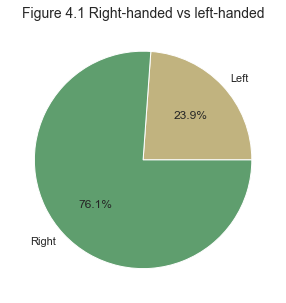

In [22]:
#grouping dataframe into two groups: left handed and right handed
foot = fifa20_df.groupby(['foot'], as_index = False).count()

#color for parts
clrs = ['#c1b37f','#5f9e6e']

plt.figure(figsize = (14, 5))
#Displaying the pie chart.
plt.pie(foot['full_name'], 
        labels = foot['foot'], 
        colors = clrs, 
        autopct='%1.1f%%',#displaying the percent
        shadow=False, 
        startangle=0)

plt.title('Figure 4.1 Right-handed vs left-handed', size = 14)
plt.show()

More than half of the players are right-handed. 

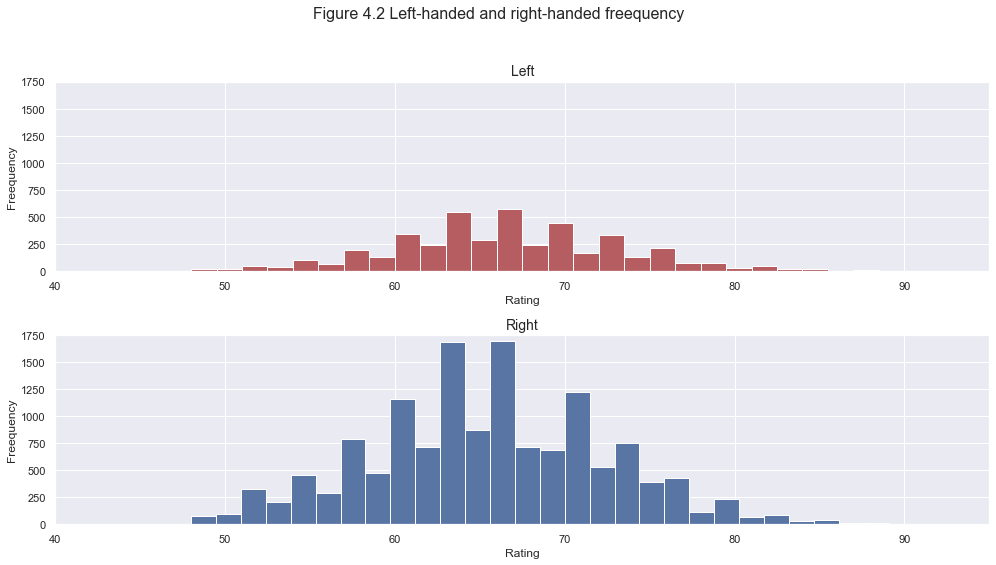

In [23]:
plt.figure(figsize = (14, 8))
plt.suptitle('Figure 4.2 Left-handed and right-handed freequency', size = 16)

#left-handed hist
plt.subplot(2,1,1)
plt.hist(fifa20_df[fifa20_df['foot'] == 'Left']['rating'], bins = 30, color = '#b55d60')
plt.xlabel("Rating", size = 12)
plt.ylabel("Freequency", size = 12)
plt.title('Left', size = 14)
plt.axis([40, 95, 0, 1750])

#right-handed hist
plt.subplot(2,1,2)
plt.hist(fifa20_df[fifa20_df['foot'] == 'Right']['rating'], bins = 30, color = '#5975a4')
plt.xlabel("Rating", size = 12)
plt.ylabel("Freequency", size = 12)
plt.title('Right', size = 14)
plt.axis([40, 95, 0, 1750])


plt.tight_layout(rect=[0, 0, 1, 0.95])

Here the data is almost similar for all ratings. The pattern is the same.

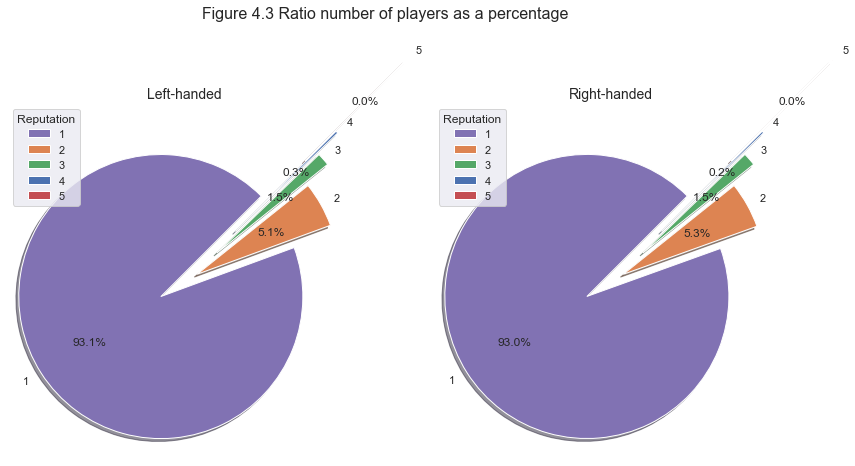

In [24]:
#We group by foot and reputation
gd = fifa20_df.groupby(['reputation', 'foot'], as_index = False).count()
clr = ['#8172b3','#dd8452','#55a868','#4c72b0','#c44e52']

plt.figure(figsize = (14, 8))
plt.suptitle('Figure 4.3 Ratio number of players as a percentage', size = 16)

#pie for left-handed
plt.subplot(1,2,1)
plt.pie(gd[gd['foot']=='Left']['full_name'], 
        labels = gd[gd['foot']=='Left']['reputation'],  
        autopct='%1.1f%%',
        shadow=True, #We need a shadow for all players with a reputation of 5
        startangle=45,
        colors = clr,
        explode = [0.2,0.1,0.3,0.5,1.2]
       )
plt.legend(title="Reputation")
plt.title('Left-handed', size = 14)

#pie for right-handed
plt.subplot(1,2,2)
plt.pie(gd[gd['foot']=='Right']['full_name'], 
        labels = gd[gd['foot']=='Right']['reputation'],  
        autopct='%1.1f%%',
        shadow=True, 
        startangle=45,
        colors = clr,
        explode = [0.2,0.1,0.3,0.5,1.2]#extract in order for easy viewing
       )

plt.legend(title="Reputation")
plt.title('Right-handed', size = 14)
plt.show()

By this pie, you can find out that the player ratios are the same.

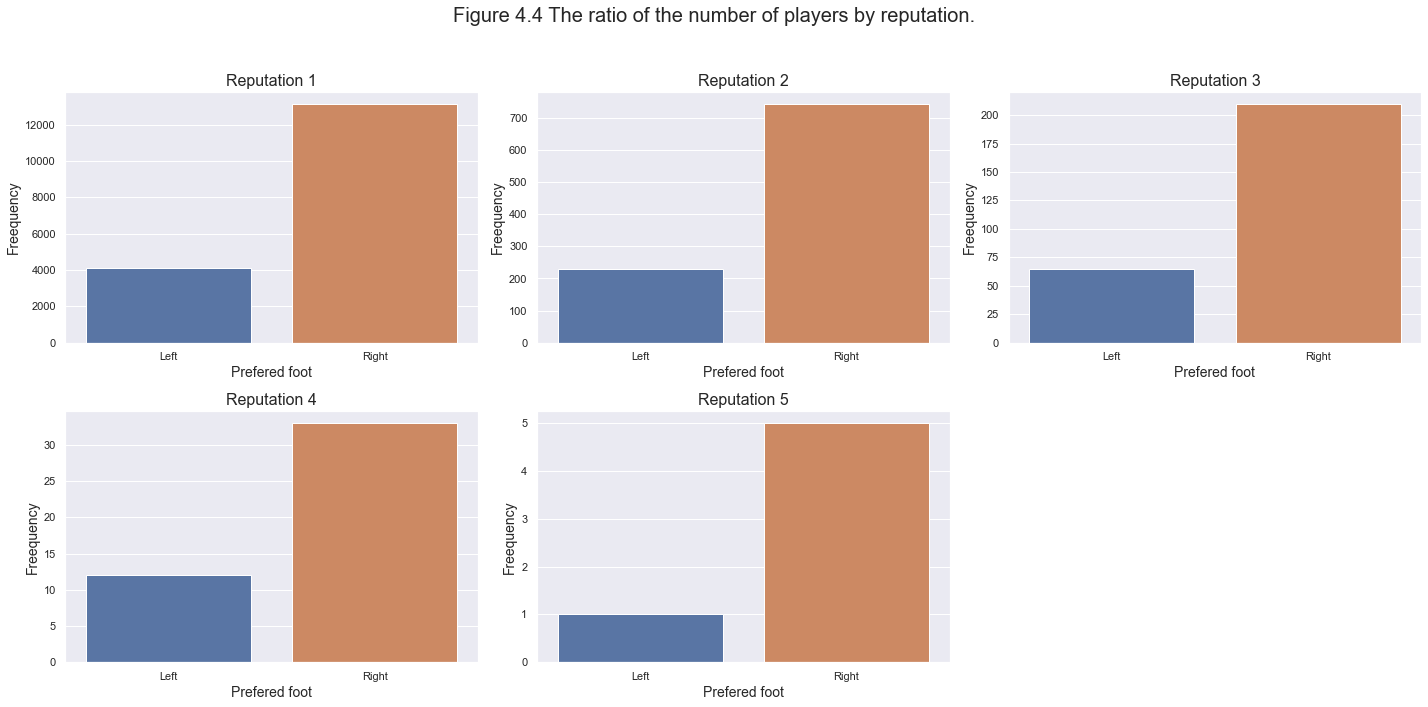

In [25]:
plt.figure(figsize = (20,10))
plt.suptitle('Figure 4.4 The ratio of the number of players by reputation.', size = 20)

#Prescribe a sheet to display for the title
rep_list = ['Reputation 1', 'Reputation 2', 'Reputation 3', 'Reputation 4', 'Reputation 5']

i = 1
while i != 6:    #Through the loop, changing the order number, we create 5 barplots by reputation
    plt.subplot(2,3,i)
    ax1 = sns.barplot(x=gd[gd['reputation']==i]['foot'], y=gd['full_name'])
    ax1.set_title(rep_list[i-1], size = 16)
    ax1.set_ylabel('Freequency', size = 14)
    ax1.set_xlabel('Prefered foot', size = 14)
    ax1.yaxis.grid(True)
    i+=1

plt.tight_layout(rect=[0, 0, 1, 0.95])

According to this graph, you can find out that the reputation of players does not depend on the fact that the player is right-handed or left-handed. The ratio here is also proportional

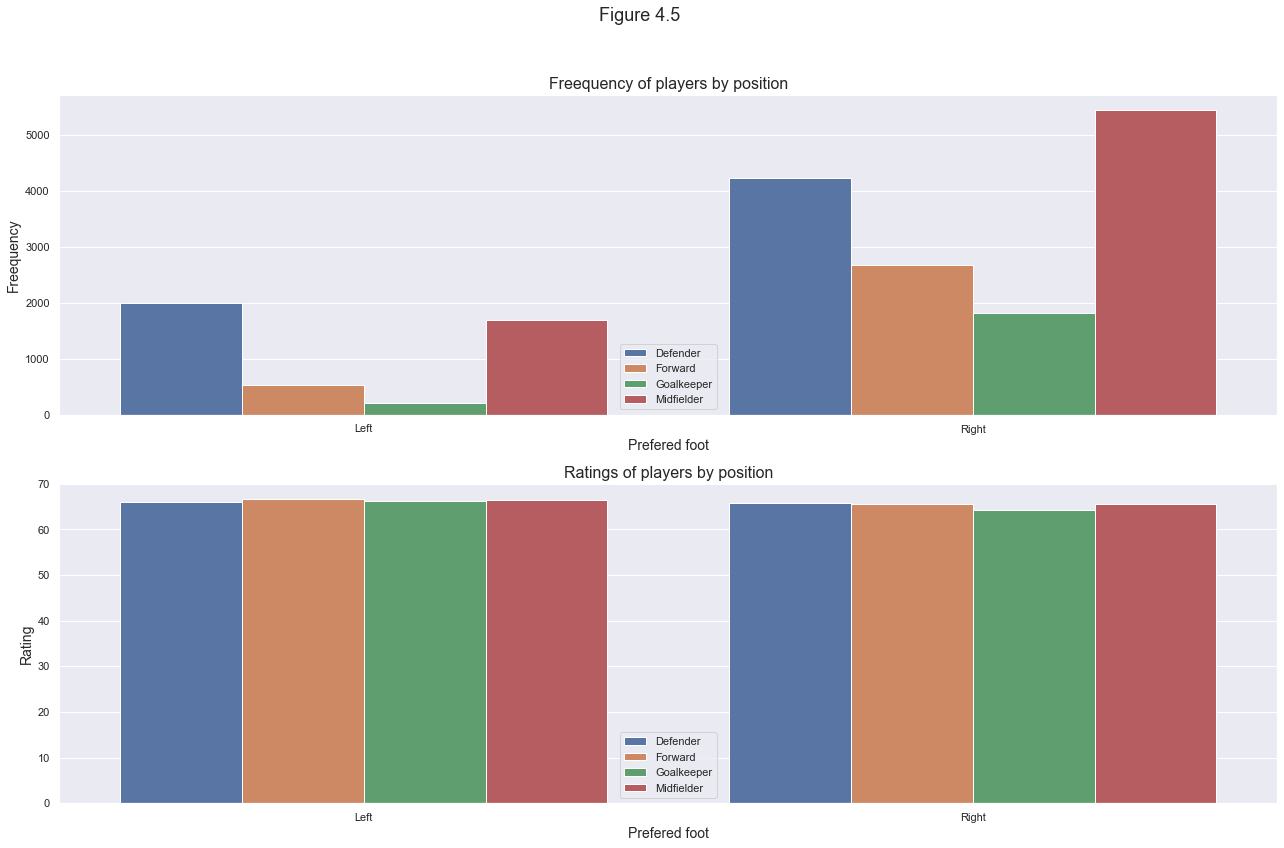

In [27]:
gpc = fifa20_df.groupby(['position', 'foot'], as_index = False).count()
gpm = fifa20_df.groupby(['position', 'foot'], as_index = False).mean()
plt.figure(figsize = (18,12))
plt.suptitle('Figure 4.5 ', size = 18)

plt.subplot(2,1,1)
ax1 = sns.barplot(x=gpc['foot'], y=gpc['rating'], hue=gpc['position'])
ax1.legend(loc = 'lower center')
ax1.set_title("Freequency of players by position", size = 16)
ax1.set_ylabel('Freequency', size = 14)
ax1.set_xlabel('Prefered foot', size = 14)
ax1.yaxis.grid(True)

plt.subplot(2,1,2)
ax2 = sns.barplot(x=gpm['foot'], y=gpm['rating'], hue=gpm['position'])
ax2.legend(loc = 'lower center')
ax2.set_title("Ratings of players by position", size = 16)
ax2.set_ylabel('Rating', size = 14)
ax2.set_xlabel('Prefered foot', size = 14)
ax2.yaxis.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])

Although the number of players is different in positions, they maintain the same ratings. But you can see that although the number of midfields is greater their average rating has not fallen but exceeds the turnover.

### Conclusion 'Right-handed vs left-handed' 
The success of player does not depend on the leg, this analysis proved that for both the results are proportional.

<a id="Analysis_player"></a>
## 3.3 Analysis player rating-to-age ratio and rating-to-position, reputation-to-age

In this part, we will analyze the relationship of these parameters: rating-to-age, rating-to-position, reputation-to-age

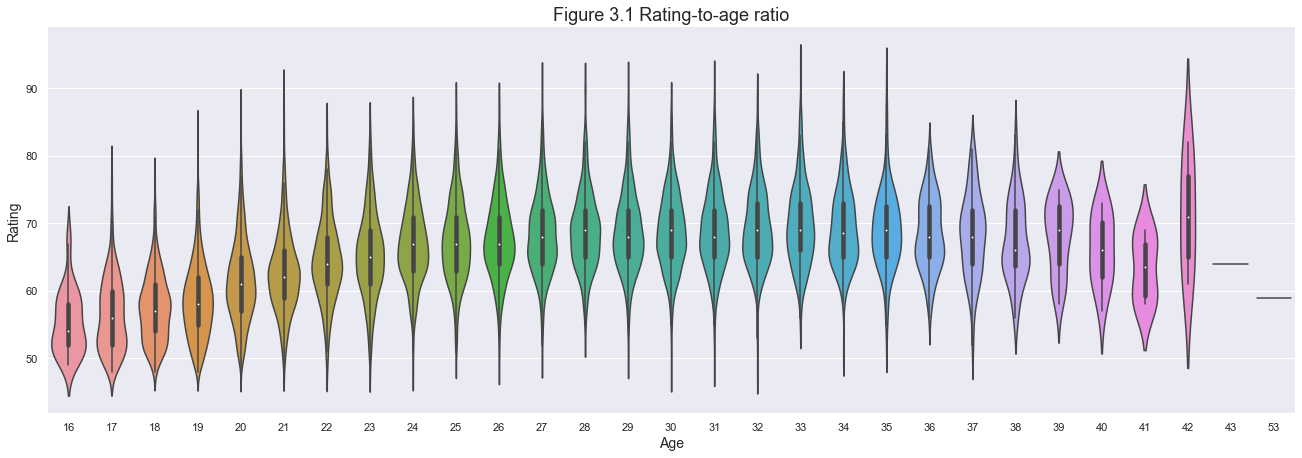

In [28]:
ax = sns.catplot(x='age',
                 y = 'rating', 
                 data=fifa20_df,
                 kind="violin", 
                 height=6, 
                 aspect=3
                )
ax = plt.title("Figure 3.1 Rating-to-age ratio", size = 18)
ax = plt.ylabel("Rating", size=14)
ax = plt.xlabel("Age", size=14)

In this section, you can see that the age range is from 16 to 53 years. And you can see that with increasing age, the rating also increases, which means that the more people play, the more experience increases and the rating increases, but this does not mean that everyone has players who lose their talent over the years and the rating decreases.

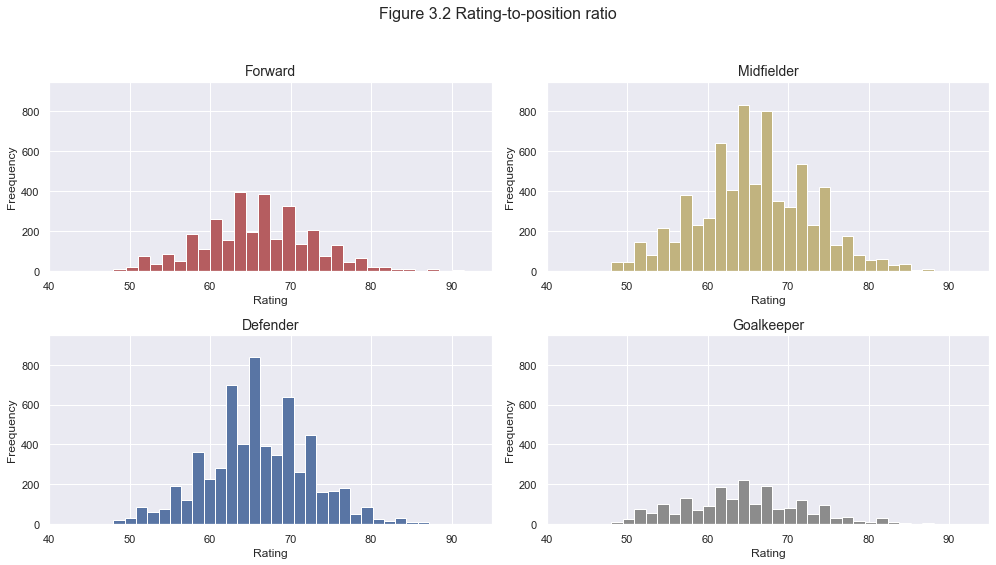

In [29]:
plt.figure(figsize = (14, 8))
plt.suptitle('Figure 3.2 Rating-to-position ratio', size = 16)

pos = ["Forward", "Midfielder", "Defender", "Goalkeeper"]
color = ['#b55d60', '#c1b37f', '#5975a4', '#8c8c8c']

n = 1
while n != 5:
    plt.subplot(2,2,n)
    plt.hist(fifa20_df[fifa20_df['position'] == pos[n-1]]['rating'], bins = 30, color = color[n-1])
    plt.xlabel("Rating", size = 12)
    plt.ylabel("Freequency", size = 12)
    plt.title(pos[n-1], size = 14)
    plt.axis([40, 95, 0, 950])
    n += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])

In this table, you can see that for all positions, the average rating is between 60 and 70. And you can see that there are very few players rated 90 for midfield and defender.

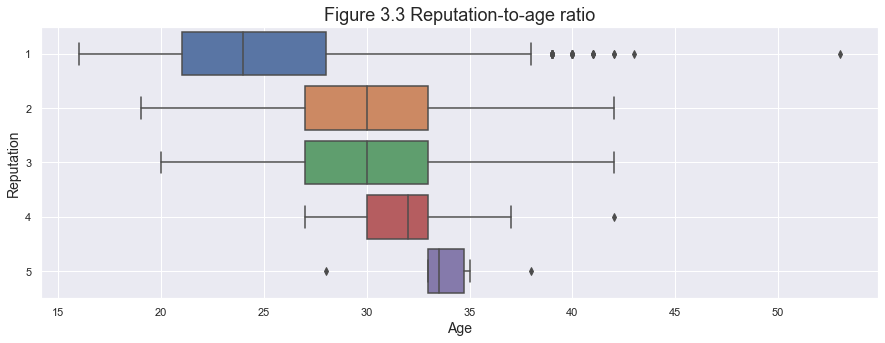

In [30]:
plt.figure(figsize = (15,5))

ax = sns.boxplot(x='age',
                 y = 'reputation', 
                 data=fifa20_df, 
                 palette='deep',
                 orient='h'
                )

plt.title("Figure 3.3 Reputation-to-age ratio", size = 18)
plt.ylabel("Reputation", size=14)
plt.xlabel("Age", size=14)

ax.yaxis.grid(True)

According to this chart, you can also see that players aged between about 25 and 35 have a five-star reputation, which also means that the greater the age, the greater the reputation. But we must not forget that the reputation is given despite the maintained constant rating and the League where the player plays, if it is not a popular League, then the player's popularity is also low. Therefore, we can say that the players who have a popularity of 5. They play in more popular leagues and have maintained their good ratings more consistently.

### Conclusion 'Analysis player rating-to-age ratio and rating-to-position, reputation-to-age'
The rating of a player depends to some extent on age the greater the rating, but there are influencing such parametr as League. And the level does not depend on the player's position. A player's reputation is influenced by factors such as age, rating stability, and League.

<a id="Conclusion"></a>
#  3. Conclusion

1. England is the leading country in terms of the number of players. And the average age for this country is 24, which is the approximate average for all football players.<br>
4. The success of the player does not depend on the leg.<br>
3. The rating of players to some extent depends on the age and experience that the player has gained while still playing in the League. The reputation is affected by such parameters as the League and the stability of the rating.
